In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/toi/multiTimeline.csv", skiprows=2)
# Выполним переименование колонок
df.columns = ['month', 'Python', 'C++', 'Java', 'PHP']
df

,month,Python,C++,Java,PHP
0,2018-12-23,30,58,25,18
1,2018-12-30,15,43,14,8
2,2019-01-06,26,47,21,15
3,2019-01-13,31,52,27,19
4,2019-01-20,31,56,26,18
...,...,...,...,...,...
255,2023-11-12,75,58,29,16
256,2023-11-19,75,61,31,16
257,2023-11-26,74,60,28,17
258,2023-12-03,71,57,28,16


In [3]:
# Выведем описание на экран
df.describe()

,Python,C++,Java,PHP
count,260.000000,260.000000,260.000000,260.000000
mean,52.126923,55.607692,28.396154,16.130769
std,17.755831,7.307368,5.319229,3.357441
min,15.000000,37.000000,13.000000,6.000000
25%,39.000000,51.000000,25.000000,13.000000
50%,44.000000,54.000000,28.000000,16.000000
75%,68.000000,60.000000,31.000000,18.250000
max,100.000000,80.000000,43.000000,23.000000


In [4]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df

,Python,C++,Java,PHP
month,,,,
2018-12-23,30,58,25,18
2018-12-30,15,43,14,8
2019-01-06,26,47,21,15
2019-01-13,31,52,27,19
2019-01-20,31,56,26,18
...,...,...,...,...
2023-11-12,75,58,29,16
2023-11-19,75,61,31,16
2023-11-26,74,60,28,17


Text(0.5, 0, 'Год')

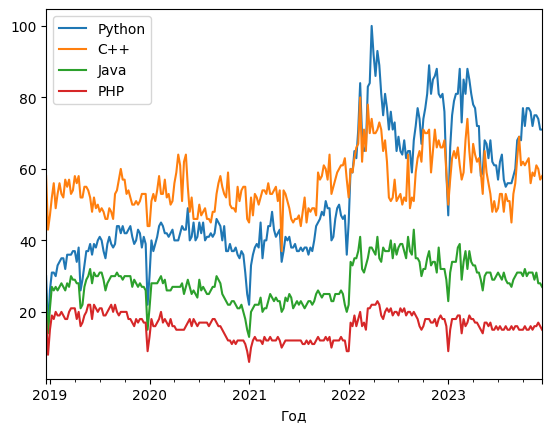

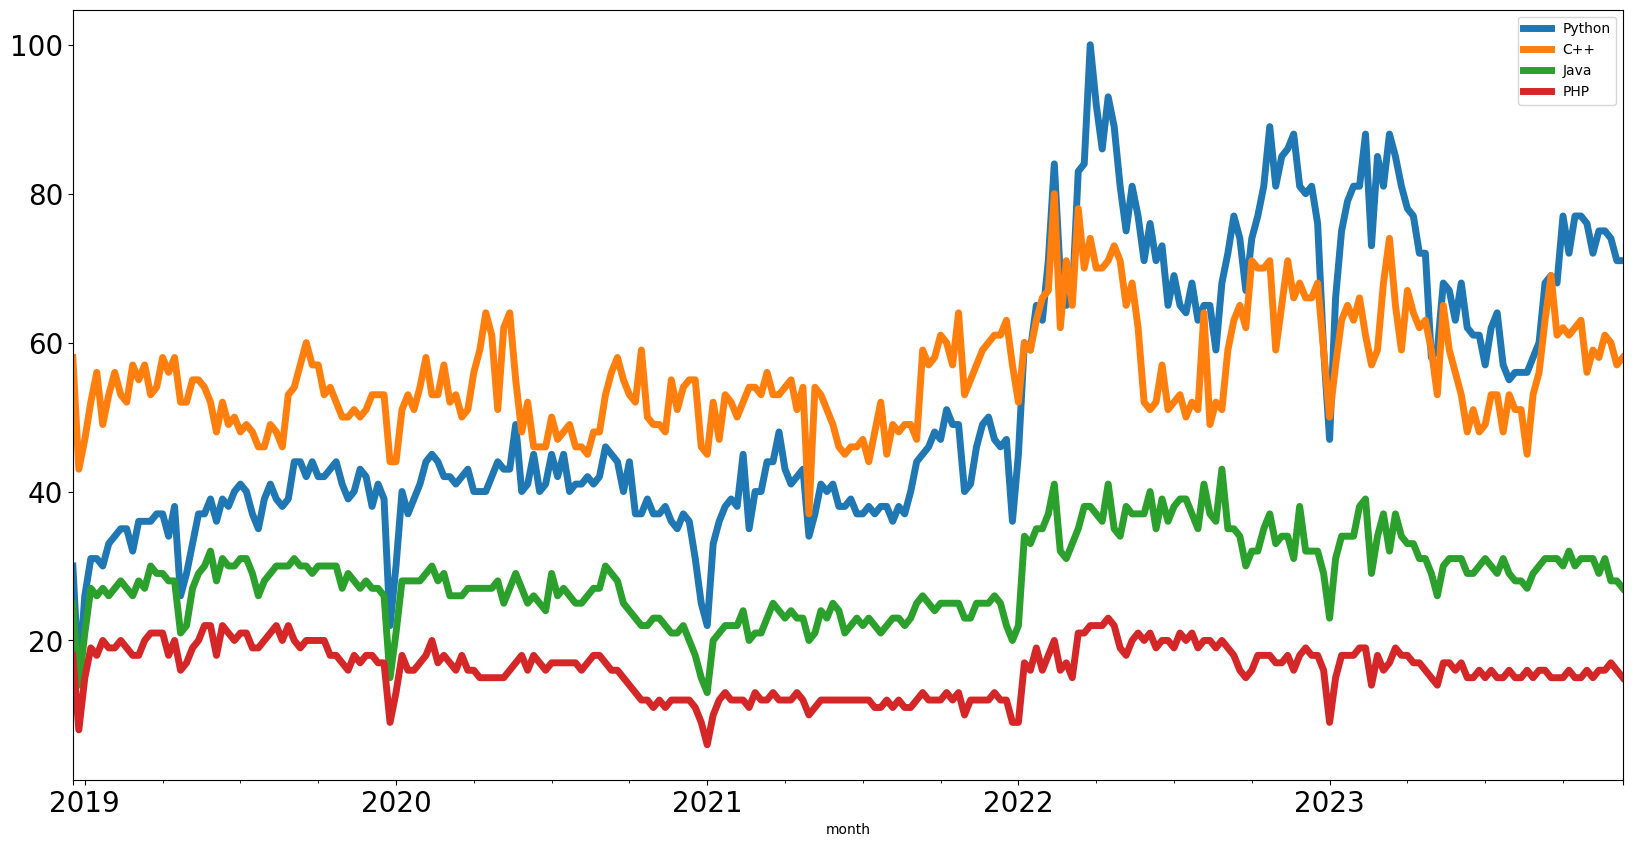

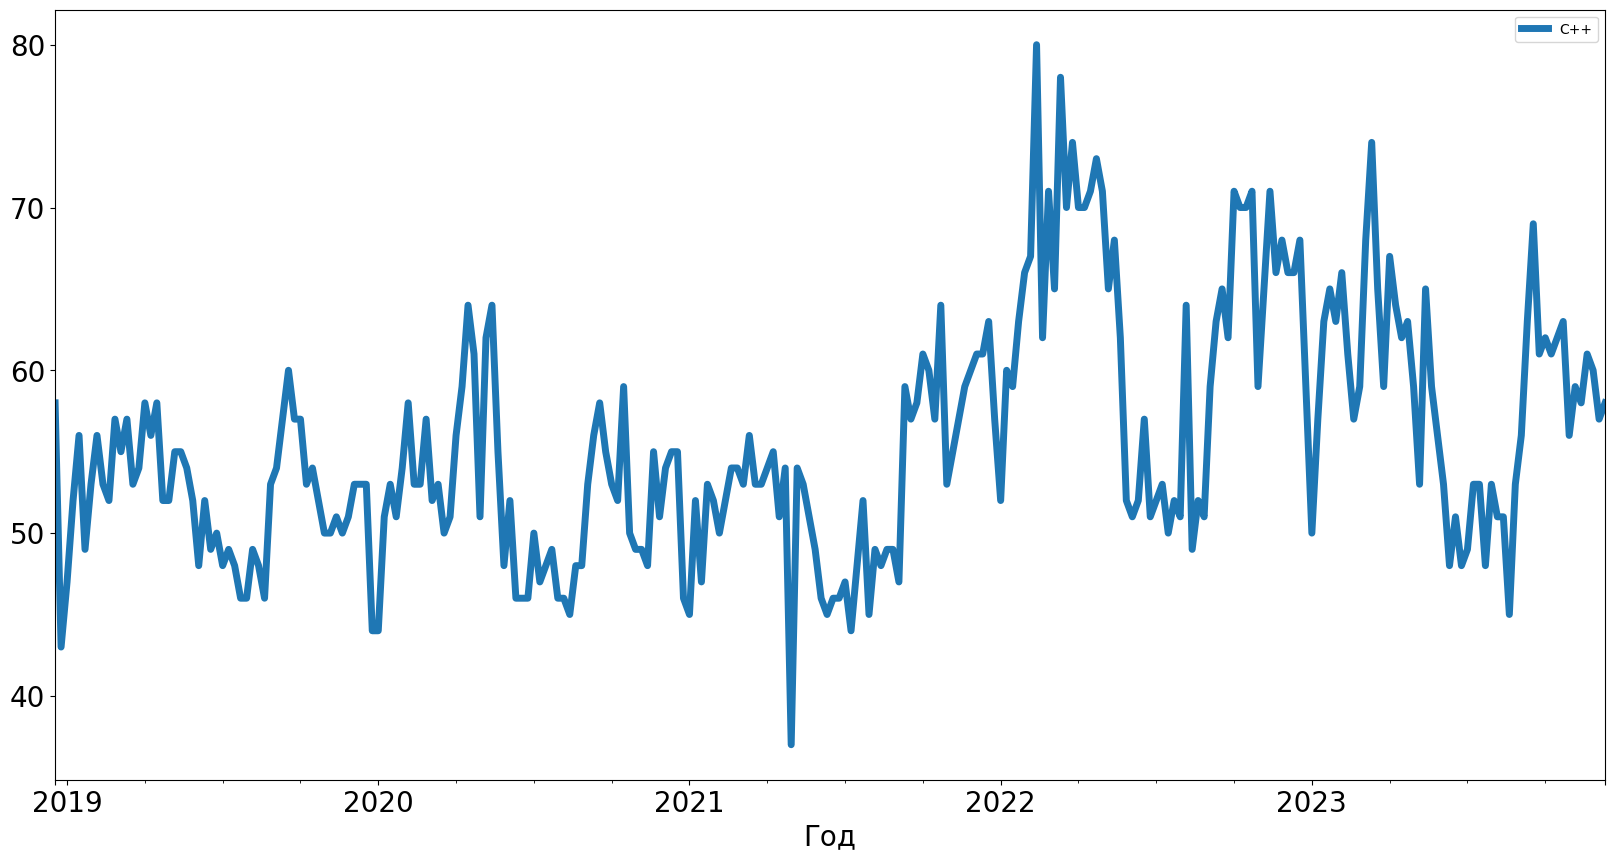

In [5]:
df.plot()
plt.xlabel('Год');
# Изменим параметры рисунка
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
# Выведем на экран один график
df[['C++']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Год', fontsize=20)

/var/folders/hh/fhwp4kk9375b4r8jygg93gzc0000gn/T/ipykernel_31761/2577360088.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  python_resamp_yr = python.resample('A').mean()


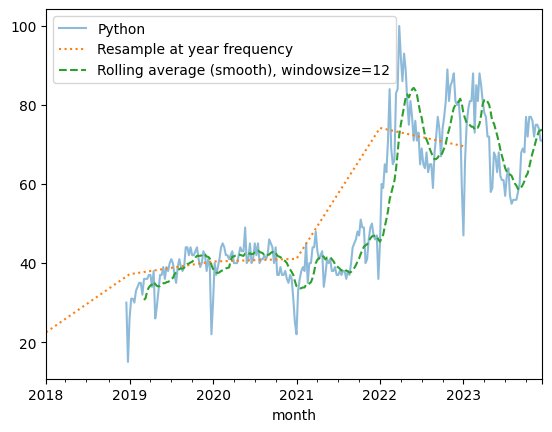

In [6]:
python = df['Python']
python_resamp_yr = python.resample('A').mean()
python_roll_yr = python.rolling(12).mean()
ax = python.plot(alpha=0.5, style='-')  # store axis (ax) for latter plots
python_resamp_yr.plot(style=':', label='Resample at year frequency', ax=ax)
python_roll_yr.plot(style='--', label='Rolling average (smooth), windowsize=12', ax=ax)
ax.legend()

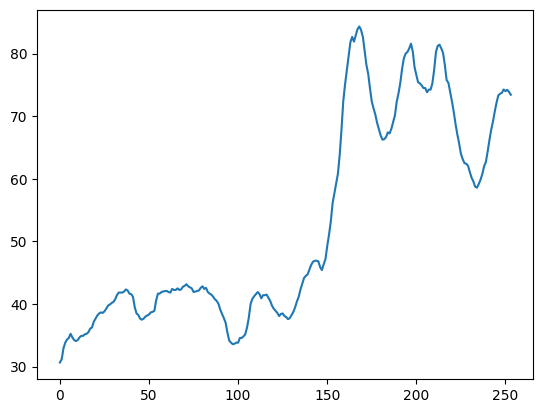

In [7]:
x = np.asarray(df[['Python']])
win = 12
win_half = int(win / 2)
python_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean()
for idx in np.arange(win_half, len(x))])
plt.plot(python_smooth)

Text(0, 0.5, 'Скользящее среднее')

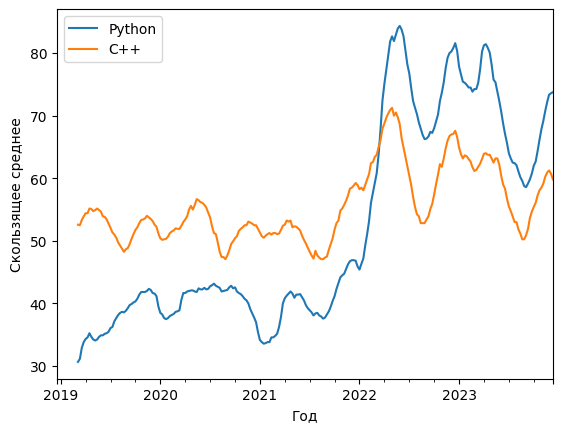

In [8]:
cpp = df['C++']
df_avg = pd.concat([python.rolling(12).mean(), cpp.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Год')
plt.ylabel('Скользящее среднее')

Text(0.5, 1.0, 'Вычитание тренда')

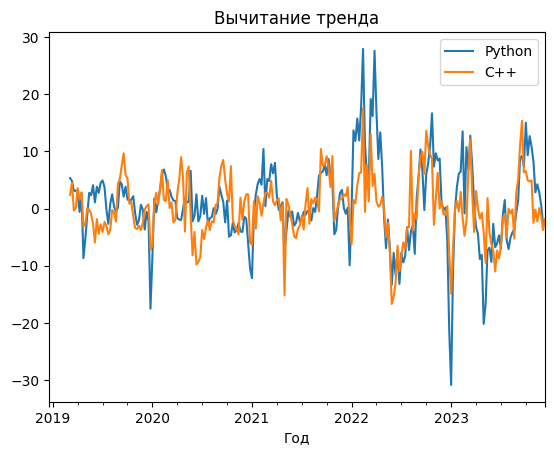

In [9]:
df_dtrend = df[["Python", "C++"]] - df_avg
df_dtrend.plot()
plt.xlabel('Год')
plt.title('Вычитание тренда')

Text(0.5, 0, 'Год')

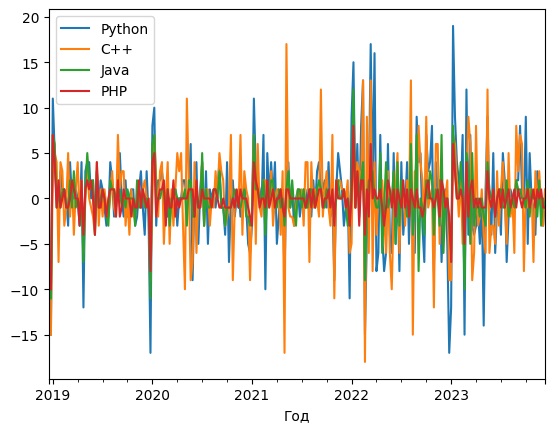

In [10]:
assert np.all((python.diff() == python - python.shift())[1:])
df.diff().plot()
plt.xlabel('Год')

In [11]:
print(df.corr())

          Python       C++      Java       PHP
Python  1.000000  0.729030  0.791270  0.376856
C++     0.729030  1.000000  0.565937  0.295285
Java    0.791270  0.565937  1.000000  0.765008
PHP     0.376856  0.295285  0.765008  1.000000


<Axes: >

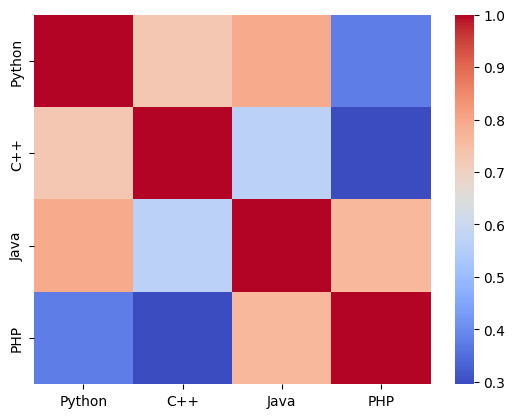

In [12]:
sns.heatmap(df.corr(), cmap="coolwarm")

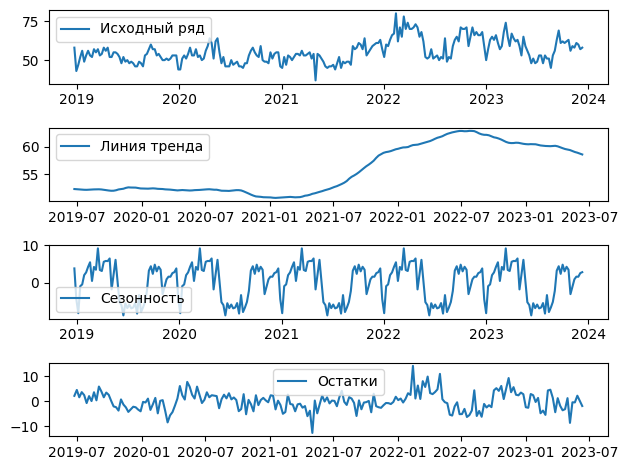

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
x = cpp
x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(x, label='Исходный ряд')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Линия тренда')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Сезонность')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Остатки')
plt.legend(loc='best')
plt.tight_layout()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

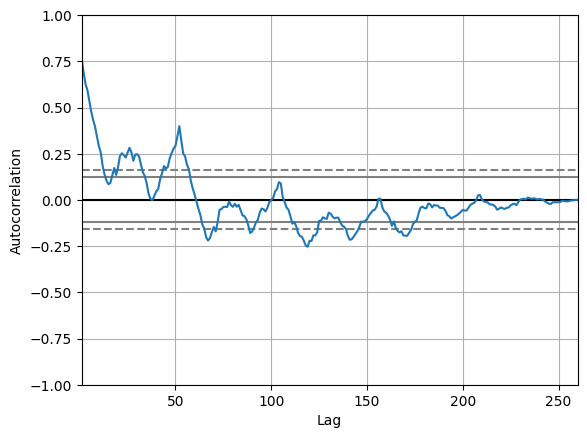

In [15]:
from pandas.plotting import autocorrelation_plot
x = df["C++"].astype(float)
autocorrelation_plot(x)

Text(0.5, 1.0, 'Функция автокорреляции')

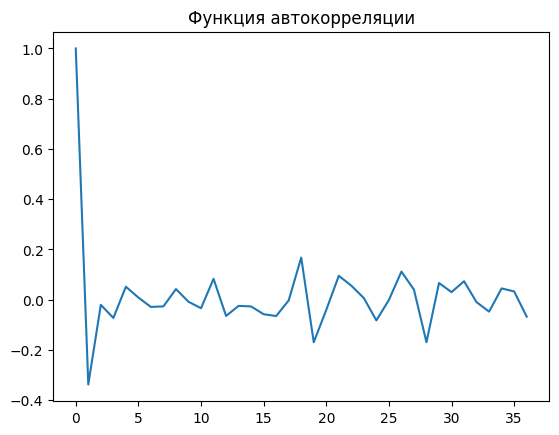

In [16]:
from statsmodels.tsa.stattools import acf
x_diff = x.diff().dropna() # first item is NA
lag_acf = acf(x_diff, nlags=36)
plt.plot(lag_acf)
plt.title('Функция автокорреляции')

In [17]:
df

,Python,C++,Java,PHP
month,,,,
2018-12-23,30,58,25,18
2018-12-30,15,43,14,8
2019-01-06,26,47,21,15
2019-01-13,31,52,27,19
2019-01-20,31,56,26,18
...,...,...,...,...
2023-11-12,75,58,29,16
2023-11-19,75,61,31,16
2023-11-26,74,60,28,17


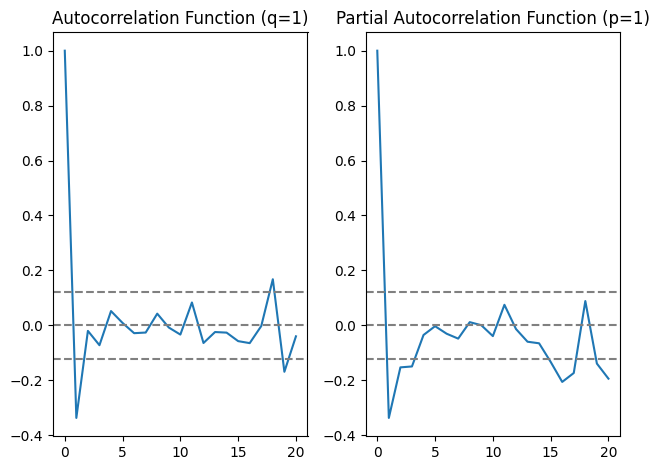

In [18]:
from statsmodels.tsa.stattools import acf, pacf
x = df['C++'].astype(float)
x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:
lag_acf = acf(x_diff, nlags=20)
lag_pacf = pacf(x_diff, nlags=20, method='ols')
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function (q=1)')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

                               SARIMAX Results                                
Dep. Variable:                    C++   No. Observations:                  260
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -760.171
Date:                Wed, 26 Jun 2024   AIC                           1528.341
Time:                        11:39:16   BIC                           1542.584
Sample:                    12-23-2018   HQIC                          1534.067
                         - 12-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6076      1.921     28.950      0.000      51.843      59.372
ar.L1          0.9100      0.030     29.929      0.000       0.850       0.970
ma.L1         -0.3900      0.058     -6.679      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 5272.6212')

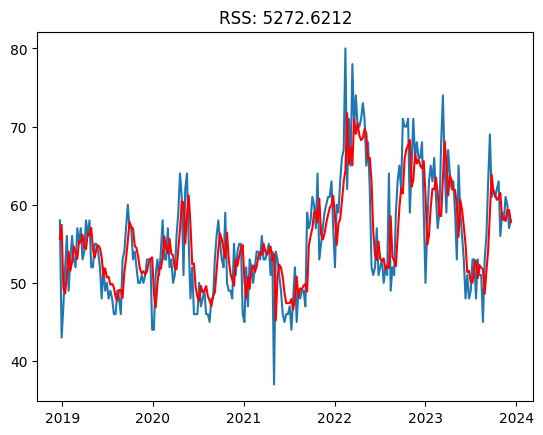

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x, order=(1, 0, 1)).fit() # подбор модели
print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))